<a href="https://colab.research.google.com/github/M-Awwab-Khan/linear-regression-implementation/blob/main/Linear_Regression_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tools
In this lab you will make use of:
- NumPy, a popular library for scientific computing
- Matplotlib, a popular library for plotting data

In [11]:
!pip install ipympl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.0 MB/s eta 0:00:00


In [12]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from lab_utils_uni import plt_intuition, plt_stationary, plt_update_onclick, soup_bowl
plt.style.use('./deeplearning.mplstyle')

# Problem Statement

As in the lecture, you will use the motivating example of housing price prediction.
This lab will use a simple data set with only two data points - a house with 1000 square feet(sqft) sold for \$300,000 and a house with 2000 square feet sold for \$500,000. These two points will constitute our *data or training set*. In this lab, the units of size are 1000 sqft and the units of price are 1000s of dollars.

| Size (1000 sqft)     | Price (1000s of dollars) |
| -------------------| ------------------------ |
| 1.0               | 300                      |
| 2.0               | 500                      |

You would like to fit a linear regression model (shown above as the blue straight line) through these two points, so you can then predict price for other houses - say, a house with 1200 sqft.


In [2]:
# x_train is the input variable (size in 1000 square feet)
# y_train is the target (price in 1000s of dollars)
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])
print(f"x_train = {x_train}")
print(f"y_train = {y_train}")

x_train = [1. 2.]
y_train = [300. 500.]


### Number of training examples `m`
You will use `m` to denote the number of training examples. Numpy arrays have a `.shape` parameter. `x_train.shape` returns a python tuple with an entry for each dimension. `x_train.shape[0]` is the length of the array and number of examples as shown below.

In [3]:
# m is the number of training examples
print(f"x_train.shape: {x_train.shape}")
m = x_train.shape[0]
print(f"Number of training examples is: {m}")

x_train.shape: (2,)
Number of training examples is: 2


### Training example `x_i, y_i`

You will use (x$^{(i)}$, y$^{(i)}$) to denote the $i^{th}$ training example. Since Python is zero indexed, (x$^{(0)}$, y$^{(0)}$) is (1.0, 300.0) and (x$^{(1)}$, y$^{(1)}$) is (2.0, 500.0).

To access a value in a Numpy array, one indexes the array with the desired offset. For example the syntax to access location zero of `x_train` is `x_train[0]`.
Run the next code block below to get the $i^{th}$ training example.

In [4]:
i = 0 # Change this to 1 to see (x^1, y^1)

x_i = x_train[i]
y_i = y_train[i]
print(f"(x^({i}), y^({i})) = ({x_i}, {y_i})")

(x^(0), y^(0)) = (1.0, 300.0)


### Plotting the data
You can plot these two points using the `scatter()` function in the `matplotlib` library, as shown in the cell below.
- The function arguments `marker` and `c` show the points as red crosses (the default is blue dots).

You can use other functions in the `matplotlib` library to set the title and labels to display

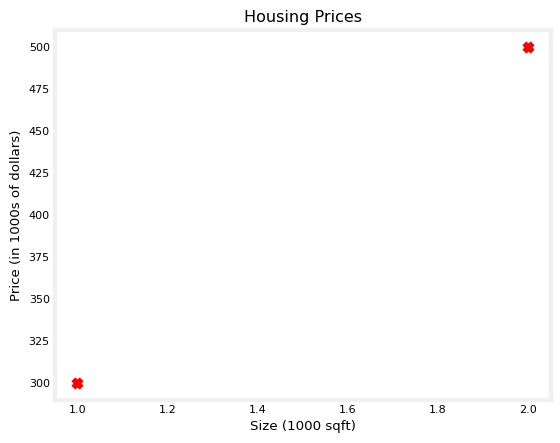

In [5]:
# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r')
# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.show()

## Computing Cost
The term 'cost' in this assignment might be a little confusing since the data is housing cost. Here, cost is a measure how well our model is predicting the target price of the house. The term 'price' is used for housing data.

The equation for cost with one variable is:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$

where
  $$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}$$
  
- $f_{w,b}(x^{(i)})$ is our prediction for example $i$ using parameters $w,b$.  
- $(f_{w,b}(x^{(i)}) -y^{(i)})^2$ is the squared difference between the target value and the prediction.   
- These differences are summed over all the $m$ examples and divided by `2m` to produce the cost, $J(w,b)$.  
>Note, in lecture summation ranges are typically from 1 to m, while code will be from 0 to m-1.


The code below calculates cost by looping over each example. In each loop:
- `f_wb`, a prediction is calculated
- the difference between the target and the prediction is calculated and squared.
- this is added to the total cost.

In [13]:
def compute_cost(x, y, w, b):
    """
    Computes the cost function for linear regression.

    Args:
      x (ndarray (m,)): Data, m examples
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters

    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0]

    cost_sum = 0
    for i in range(m):
        f_wb = w * x[i] + b
        cost = (f_wb - y[i]) ** 2
        cost_sum = cost_sum + cost
    total_cost = (1 / (2 * m)) * cost_sum

    return total_cost

## Cost Function Intuition
Your goal is to find a model $f_{w,b}(x) = wx + b$, with parameters $w,b$,  which will accurately predict house values given an input $x$. The cost is a measure of how accurate the model is on the training data.

The cost equation (1) above shows that if $w$ and $b$ can be selected such that the predictions $f_{w,b}(x)$ match the target data $y$, the $(f_{w,b}(x^{(i)}) - y^{(i)})^2 $ term will be zero and the cost minimized. In this simple two point example, you can achieve this!

In the previous lab, you determined that $b=100$ provided an optimal solution so let's set $b$ to 100 and focus on $w$.

<br/>
Below, use the slider control to select the value of $w$ that minimizes cost. It can take a few seconds for the plot to update.

In [16]:
from google.colab import output
output.enable_custom_widget_manager()

In [17]:
plt_intuition(x_train,y_train)

interactive(children=(IntSlider(value=150, description='w', max=400, step=10), Output()), _dom_classes=('widge…

Support for third party widgets will remain active for the duration of the session. To disable support:

The plot contains a few points that are worth mentioning.
- cost is minimized when $w = 200$, which matches results from the previous lab
- Because the difference between the target and pediction is squared in the cost equation, the cost increases rapidly when $w$ is either too large or too small.
- Using the `w` and `b` selected by minimizing cost results in a line which is a perfect fit to the data.

## Cost Function Visualization- 3D

You can see how cost varies with respect to *both* `w` and `b` by plotting in 3D or using a contour plot.   
It is worth noting that some of the plotting in this course can become quite involved. The plotting routines are provided and while it can be instructive to read through the code to become familiar with the methods, it is not needed to complete the course successfully. The routines are in lab_utils_uni.py in the local directory.
### Larger Data Set
It's use instructive to view a scenario with a few more data points. This data set includes data points that do not fall on the same line. What does that mean for the cost equation? Can we find $w$, and $b$ that will give us a cost of 0?

In [18]:
x_train = np.array([1.0, 1.7, 2.0, 2.5, 3.0, 3.2])
y_train = np.array([250, 300, 480,  430,   630, 730,])

In the contour plot, click on a point to select `w` and `b` to achieve the lowest cost. Use the contours to guide your selections. Note, it can take a few seconds to update the graph.

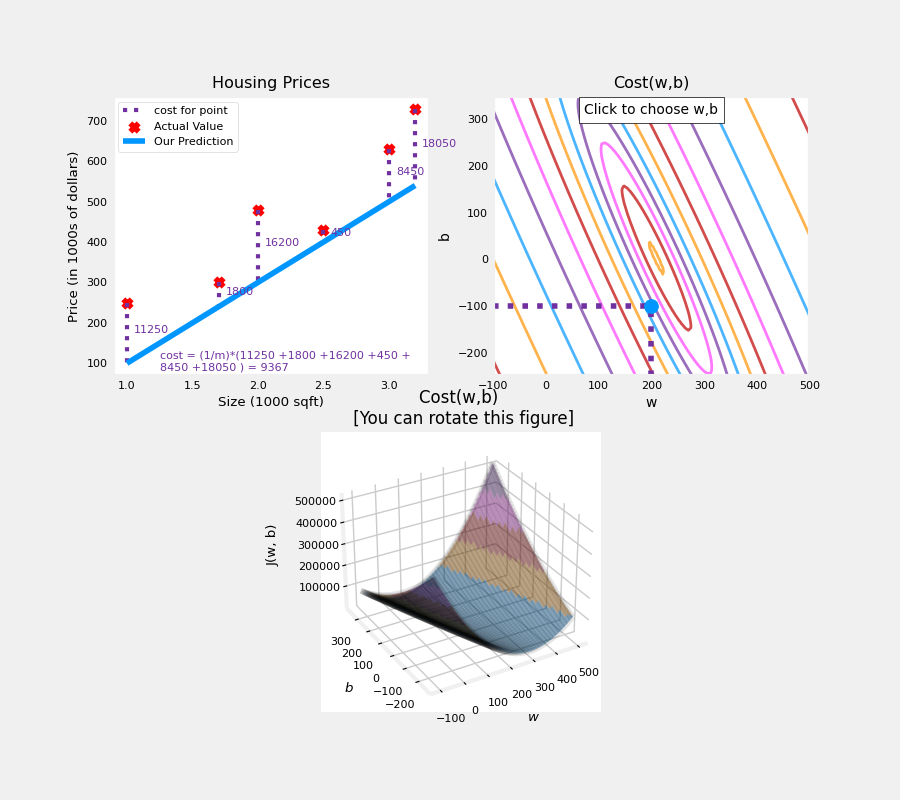

In [19]:
plt.close('all')
fig, ax, dyn_items = plt_stationary(x_train, y_train)
updater = plt_update_onclick(fig, ax, x_train, y_train, dyn_items)

## Model function
As described in lecture, the model function for linear regression (which is a function that maps from `x` to `y`) is represented as

$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$

The formula above is how you can represent straight lines - different values of $w$ and $b$ give you different straight lines on the plot.

Let's try to get a better intuition for this through the code blocks below. Let's start with $w = 200$ and $b = 100$.

**Note: You can come back to this cell to adjust the model's w and b parameters**

In [6]:
w = 200
b = 100
print(f"w: {w}")
print(f"b: {b}")

w: 200
b: 100


Now, let's compute the value of $f_{w,b}(x^{(i)})$ for your two data points. You can explicitly write this out for each data point as -

for $x^{(0)}$, `f_wb = w * x[0] + b`

for $x^{(1)}$, `f_wb = w * x[1] + b`

For a large number of data points, this can get unwieldy and repetitive. So instead, you can calculate the function output in a `for` loop as shown in the `compute_model_output` function below.
> **Note**: The argument description `(ndarray (m,))` describes a Numpy n-dimensional array of shape (m,). `(scalar)` describes an argument without dimensions, just a magnitude.  
> **Note**: `np.zero(n)` will return a one-dimensional numpy array with $n$ entries   


In [7]:
def compute_model_output(x, w, b):
    """
    Computes the prediction of a linear model
    Args:
      x (ndarray (m,)): Data, m examples
      w,b (scalar)    : model parameters
    Returns
      y (ndarray (m,)): target values
    """
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b

    return f_wb

Now let's call the `compute_model_output` function and plot the output..

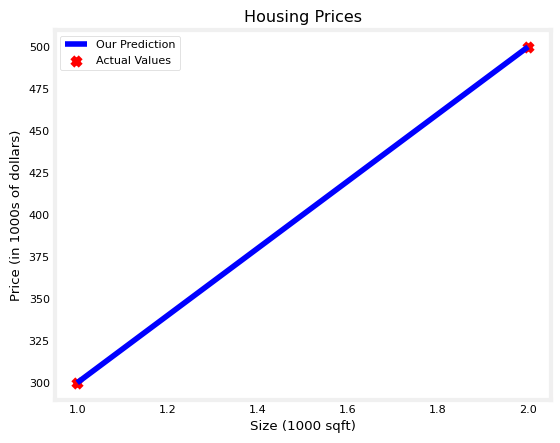

In [8]:
tmp_f_wb = compute_model_output(x_train, w, b,)

# Plot our model prediction
plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()

### Prediction
Now that we have a model, we can use it to make our original prediction. Let's predict the price of a house with 1200 sqft. Since the units of $x$ are in 1000's of sqft, $x$ is 1.2.


In [9]:
w = 200
b = 100
x_i = 1.2
cost_1200sqft = w * x_i + b

print(f"${cost_1200sqft:.0f} thousand dollars")

$340 thousand dollars
